# 1.- Importar las librerias

Primero es necesario importar algunas librerías que nos proporcionaran métodos o funciones para aplicar distintos métodos de clustering.

Las principales son ***pandas*** y ***numpy***, que se utilizan para todo el preprocesamiento de los datos; y todas las derivadas de ***sklearn***, que integra las herramientas de minería de datos a emplear, así como el tratamiento específico de los datos para estos métodos.

In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib. pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# 2.- Desarrollo: Proceso KDD

## 2.1.- Carga de la base de datos

La base de datos a utilizar tiene como nombres *wine.csv*. Para más información al respecto, se puede consultar el diccionario de datos ubicado en el reporte.
Utilizamos el método de pandas llamado **read_csv()**, eliminamos los nulos con **dropna()** y mostramos la descripción de los atributos con **info()**.

In [3]:
data=pd.read_csv("wine.csv")
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                        178 non-null int64
Alcohol                      178 non-null float64
MalicAcid                    178 non-null float64
Ash                          178 non-null float64
AlcalinityOfAsh              178 non-null float64
Magnesium                    178 non-null int64
TotalPhenols                 178 non-null float64
Flavanoids                   178 non-null float64
NonflavanoidPhenols          178 non-null float64
Proanthocyanins              178 non-null float64
ColorIntensity               178 non-null float64
Hue                          178 non-null float64
OD280/OD315OfDilutedWines    178 non-null float64
Proline                      178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 20.9 KB


## 2.2.- Correlaciones entre atributos

Class  es numeroint64
Alcohol  es numerofloat64
MalicAcid  es numerofloat64
Ash  es numerofloat64
AlcalinityOfAsh  es numerofloat64
Magnesium  es numeroint64
TotalPhenols  es numerofloat64
Flavanoids  es numerofloat64
NonflavanoidPhenols  es numerofloat64
Proanthocyanins  es numerofloat64
ColorIntensity  es numerofloat64
Hue  es numerofloat64
OD280/OD315OfDilutedWines  es numerofloat64
Proline  es numeroint64


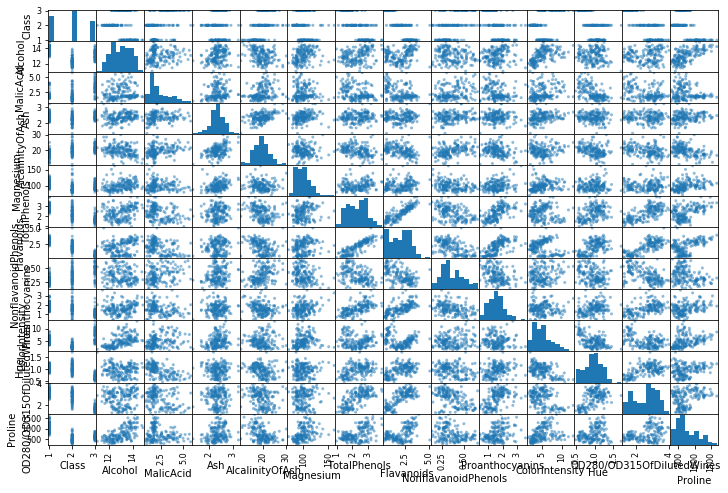

In [4]:
def seleccionarAtributos(columnas):
    atributos=[]
    for i in columnas:
        if data[i].dtype == "object":
            print("{} no es numero".format(i))
            
        else: 
            print("{}  es numero{}".format(i,data[i].dtype))
            atributos.append(i)
    return atributos

data.corr()
scatter_matrix(data[seleccionarAtributos(data.columns)],figsize=(12,8))
plt.savefig("correlaciones.png")
plt.show()

## 2.3.- Transformación y selección de los datos

In [5]:
def estandarizar(columns):
    scaler = MinMaxScaler()
    dfEstandarizado=pd.DataFrame(np.arange(data.shape[0]))
    for i in columns:
        aux=scaler.fit_transform(np.array(data[i]).reshape(-1,1))
        dfEstandarizado["{}_std".format(i)]=aux
    return dfEstandarizado

dfEstandarizado=estandarizar(seleccionarAtributos(data.columns)).iloc[:,2:]
dfEstandarizado.head()

Class  es numeroint64
Alcohol  es numerofloat64
MalicAcid  es numerofloat64
Ash  es numerofloat64
AlcalinityOfAsh  es numerofloat64
Magnesium  es numeroint64
TotalPhenols  es numerofloat64
Flavanoids  es numerofloat64
NonflavanoidPhenols  es numerofloat64
Proanthocyanins  es numerofloat64
ColorIntensity  es numerofloat64
Hue  es numerofloat64
OD280/OD315OfDilutedWines  es numerofloat64
Proline  es numeroint64


,Alcohol_std,MalicAcid_std,Ash_std,AlcalinityOfAsh_std,Magnesium_std,TotalPhenols_std,Flavanoids_std,NonflavanoidPhenols_std,Proanthocyanins_std,ColorIntensity_std,Hue_std,OD280/OD315OfDilutedWines_std,Proline_std
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [6]:
pca=PCA(n_components=4)
pc=pca.fit_transform(dfEstandarizado)
pcaDesc=pd.DataFrame({"var":pca.explained_variance_ratio_,"PC":["PC1","PC2","PC3","PC4"]})
dfPCA=pd.DataFrame(data=pc,columns=["PC1","PC2","PC3","PC4"])
pcaDesc.head()

,var,PC
0,0.407495,PC1
1,0.189704,PC2
2,0.085617,PC3
3,0.074267,PC4


In [7]:
dfPCA.head()

,PC1,PC2,PC3,PC4
0,-0.706336,-0.253193,0.024093,0.013263
1,-0.484977,-0.008823,-0.280482,0.075898
2,-0.521172,-0.189187,0.196217,-0.015784
3,-0.821644,-0.580906,0.081110,0.012235
4,-0.202546,-0.059467,0.300240,-0.102051


## 2.4.- Minería de datos(Clustering)* 
### 2.4.1.-Graficamos los datos de los elementos que consideraremos para generar clusters

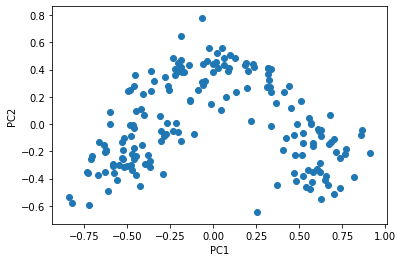

In [8]:
plt.scatter(dfPCA["PC1"],dfPCA["PC2"])
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.savefig("datos.png")
plt.show()

### 2.4.2.- Guardamos los datos en un array de numpy para el procesamiento

In [9]:
X=np.array(dfPCA[["PC1","PC2"]])
predictions=pd.DataFrame()

In [10]:
def graficarCentroides(centros):
    x1=[]
    y1=[]
    for x,y in centros:
        x1.append(x)
        y1.append(y)
    plt.scatter(x1,y1,marker="X",c="w",edgecolors="k")

### 2.4.3.- Aglomerativo MST Average Link

Para utilizar el algoritmo aglomerativo de MST con Average Link, se utiliza el método de la librería sklearn **AgglomerativeClustering()**, que recibe dos parámetros: el número de clusters  ***n_clusters*** que se desean generar, y el tipo de enlace ***linkage*** que va a usar como criterio de unión de clusters, en este caso *average* o promedio.

Adicionalmente, con el método **fit_predict()**, que recibe como parámetro el arreglo de numpy creado en el paso anteriormente, se ingresan los datos a agrupar.
Por último, los resultados del clustering se guardan en un nuevo atributo en la base de datos, llamado **AveragePrediction**, y luego se grafican.

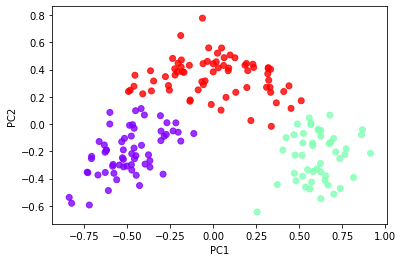

In [11]:
average = AgglomerativeClustering(n_clusters=3, linkage = "average").fit(X)
data["AveragePrediction"]=average.fit_predict(X)
plt.scatter(dfPCA["PC1"],
            dfPCA["PC2"],
            c=data["AveragePrediction"],
            cmap="rainbow",
           alpha=0.8)
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.savefig("average-link.png")
plt.show()

### 2.4.4.- Aglomerativo MST Complete Link

Se crea de forma casi identica al anterior, ahora cambiando el tipo de enlace en el atributo ***linkage*** por *complete*.

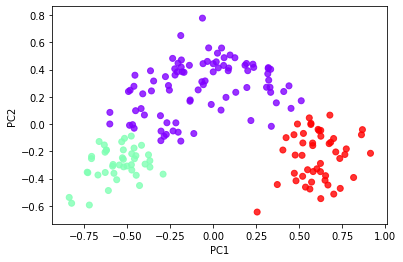

In [12]:
complete = AgglomerativeClustering(n_clusters=3, linkage = "complete").fit(X)
data["CompletePrediction"]=complete.fit_predict(X)
plt.scatter(dfPCA["PC1"],
            dfPCA["PC2"],
            c=data["CompletePrediction"],
            cmap="rainbow",
           alpha=0.8)
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.savefig("complete-link.png")
plt.show()

El tipo de enlace único o *single link* se descartó ya que generaba un solo cluster con todos los datos dentro de él.

### 2.4.5.- K-Means

Para utilizar el algoritmo de K-Means, se utiliza el método de la librería sklearn **KMeans()**, que recibe como parámetro el número de clusters ***n_clusters*** que se desean generar. 

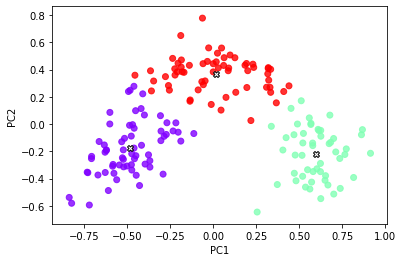

In [13]:
kmeans = KMeans(n_clusters=3).fit(X)
data["KMEANSprediction"]=kmeans.fit_predict(X)
plt.scatter(dfPCA["PC1"],
            dfPCA["PC2"],
            c=data["KMEANSprediction"],
            cmap="rainbow",
           alpha=0.8)
graficarCentroides(kmeans.cluster_centers_)
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.savefig("KMeans.png")
plt.show()

### 2.4.5.- DBSCAN

Para utilizar el algoritmo DBSCAN, se utiliza el método de la librería sklearn **DBSCAN()**, que recibe dos parámetros: la distancia de umbral máxima entre dos puntos para que uno se considere en la vecindad del otro (densidad) ***eps***, y el número mínimo de puntos en cada cluster ***min_samples***.

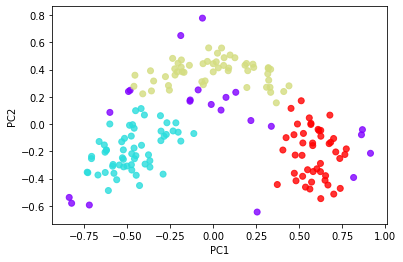

In [14]:
dbscan = DBSCAN(eps=0.14, min_samples=10).fit(X)
data["DBSCANPrediction"]=dbscan.fit_predict(X)
plt.scatter(dfPCA["PC1"],
            dfPCA["PC2"],
            c=data["DBSCANPrediction"],
            cmap="rainbow",
           alpha=0.8)
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.savefig("dbscan.png")
plt.show()

### 2.4.6.- BIRCH

Para utilizar el algoritmo BIRCH, se utiliza el método de la librería sklearn **Birch()**, que recibe tres parámetros: el número máximo de subgrupos de CF en cada nodo ***branching_factor***, el número de clusters que se desean generar ***n_clusters*** y un radio de umbral máximo entre el subcluster obtenido mediante la fusión de un nuevo punto y el subcluster más cercano ***threshold***.

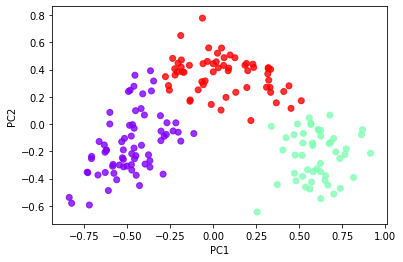

In [15]:
birch = Birch(branching_factor=30, n_clusters=3, threshold=0.17).fit(X)
data["BIRCHPrediction"]=birch.fit_predict(X)
plt.scatter(dfPCA["PC1"],
            dfPCA["PC2"],
            c=data["BIRCHPrediction"],
            cmap="rainbow",
           alpha=0.8)
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.savefig("birch.png")
plt.show()

## 2.5.- Validación del modelo

### 2.5.1.- Coeficiente de la silueta

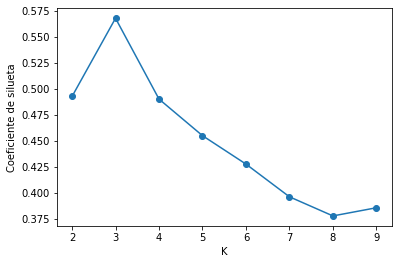

In [16]:
metricEv=[]
ks=range(2,10)
for i in ks:
    kmeanEv = KMeans(n_clusters=i).fit(X)
    labels = kmeanEv.labels_
    metricEv.append(metrics.silhouette_score(X, labels, metric='euclidean'))
plt.plot(ks,metricEv,"o-")
plt.ylabel("Coeficiente de silueta")
plt.xlabel("K")
plt.savefig("silueta-Ks.png")
plt.show()

### 2.5.2.- Comprobando con las clases ya definidas

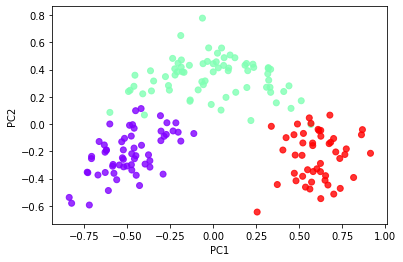

In [17]:
plt.scatter(dfPCA["PC1"],
            dfPCA["PC2"],
            c=data["Class"],
            cmap="rainbow",
           alpha=0.8)
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.savefig("clases.png")
plt.show()

### 2.5.2.- Histogramas

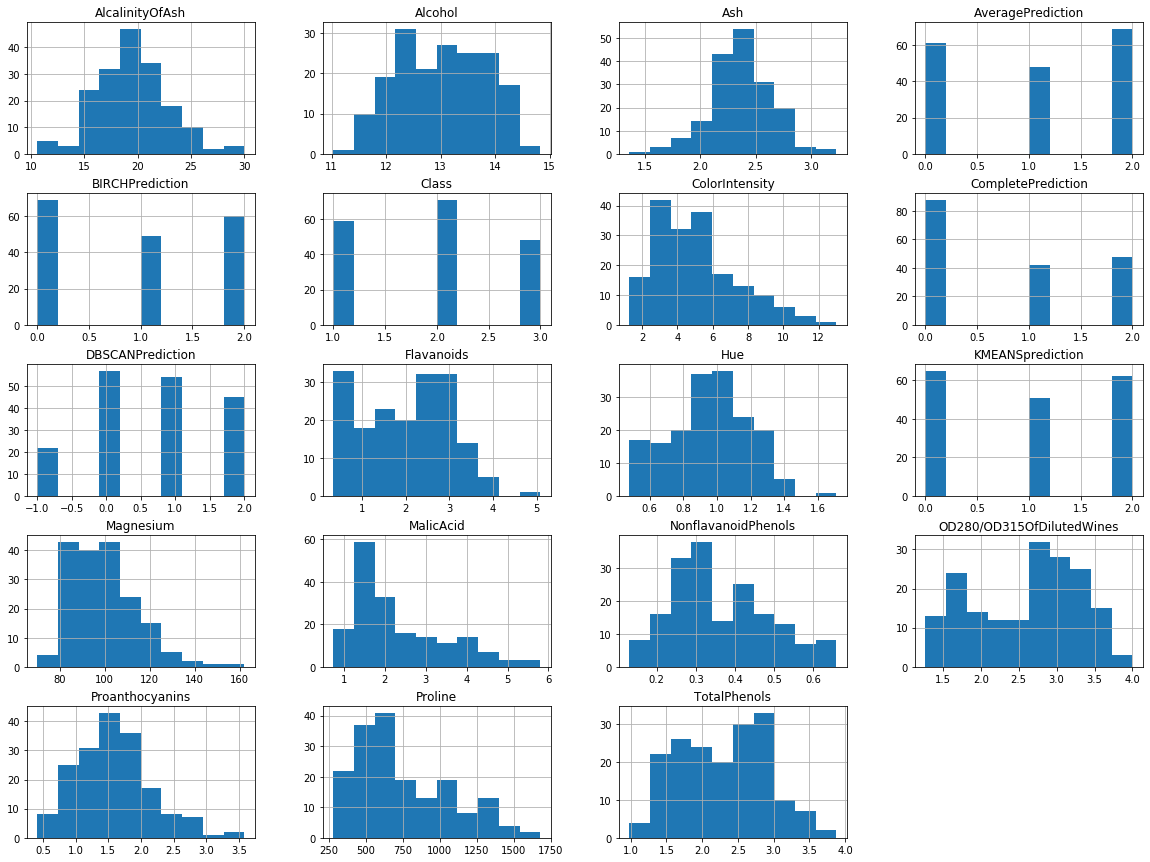

In [18]:
data.hist(figsize=(20,15))
plt.savefig("histogramas.png")

In [19]:
data.to_csv("data_results_clustering.csv")